# HRD dropsonde read and plot. 
### Need to multiply by pint units to unlock MetPy functionality

We are working with files like https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/D20210828_091908QC.frd
No need to download! 

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [53]:
cnames = ['IX','t_s','P_mb','T_C','RH','Z_m','WD','WS_ms','U_ms','V_ms','NS','WZ_ms','ZW_m','FP','FT','FH','FW','LAT','LON']

filename = 'https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/D20210828_091908QC.frd'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 

# aww shoot, there are spaces in the header line like between P and (mb) so it looks like 2 things
# so I had to manually make column names,
# cnames = ['IX','t(s)','P(mb)','T(C)','RH(%)','Z(m)','WD','WS(m/s)','U(m/s)','V(m/s)','NS','WZ(m/s)','ZW(m)','FP','FT','FH','FW','LAT','LON']

,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON
0,1,0.00,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
1,2,0.25,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
2,3,0.50,-999.0,-999.00,83.6,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
3,4,0.75,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
4,5,1.00,-999.0,-999.00,83.5,-999,-999,-999.00,-999.00,-999.00,4,-999.0,-999,0,0,0,0,-999.000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1151,287.50,1006.8,26.79,70.0,17,55,17.94,-14.77,-10.19,10,-1.2,17,0,0,0,0,25.168,-86.752
1151,1152,287.75,-999.0,-999.00,-999.0,-999,57,17.86,-14.96,-9.75,11,-999.0,-999,0,0,0,0,-999.000,-999.000
1152,1153,288.00,1007.6,26.86,69.7,10,59,17.77,-15.17,-9.26,12,-1.3,10,0,0,0,0,25.168,-86.752
1153,1154,288.25,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,11,-999.0,-999,0,0,0,0,-999.000,-999.000


In [54]:
# replace -999 values with NaN mask 
df.mask((df <= -900), inplace=True)
df

,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON
0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
1,2,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
2,3,0.50,NaN,NaN,83.6,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
3,4,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
4,5,1.00,NaN,NaN,83.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1151,287.50,1006.8,26.79,70.0,17.0,55.0,17.94,-14.77,-10.19,10.0,-1.2,17.0,0,0,0,0,25.168,-86.752
1151,1152,287.75,NaN,NaN,NaN,NaN,57.0,17.86,-14.96,-9.75,11.0,NaN,NaN,0,0,0,0,NaN,NaN
1152,1153,288.00,1007.6,26.86,69.7,10.0,59.0,17.77,-15.17,-9.26,12.0,-1.3,10.0,0,0,0,0,25.168,-86.752
1153,1154,288.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,0,0,0,0,NaN,NaN


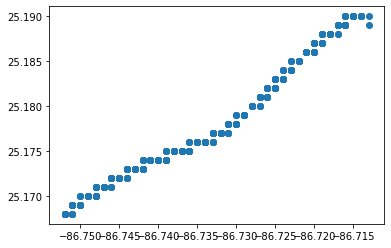

In [55]:
# Where was the drosonde as it fell? 
plt.scatter(df.LON, df.LAT)

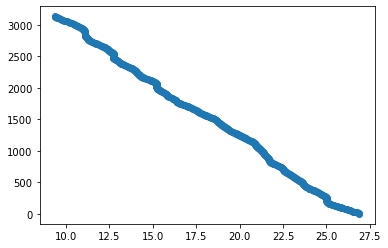

In [61]:
# Temperature profile
plt.scatter(df.T_C, df.Z_m)

--------------------------
# OK, that was one sonde -- want to combine all of them from a flight
Should we open all the sondes as a [datafram of dataframes](https://stackoverflow.com/questions/35932060/dataframe-of-dataframes-in-python-pandas) or what?